In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import time
import mediapy as media

In [114]:
# Download and load the training set
train_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=True, download=False)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the test set
test_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=False, download=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

print(train_images.shape)

(60000, 28, 28)


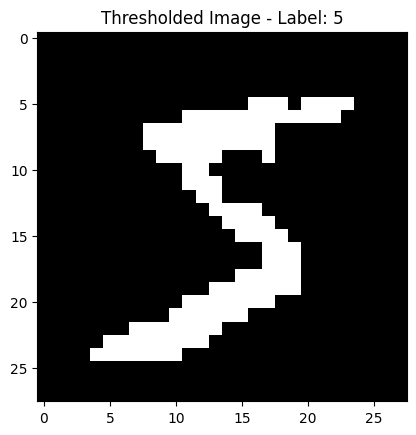

[[-1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1.  1.  1.  1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.  1. -1. -1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.  1.  1.  1.  1.]]


In [115]:
threshold_value = 100  # Pixel intensity threshold (0-255)
train_images = np.where(train_images > threshold_value, 1.0, -1.0)
test_images = np.where(test_images > threshold_value, 1.0, -1.0)

plt.imshow(train_images[0], cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()

print(train_images[0][10:20, 10:20])


In [116]:
n_data = 1000
data = train_images[:n_data]
data_labels = train_labels[:n_data]

n_nodes = data.shape[1] * data.shape[2]

batch_size = 1

num_iter = data.shape[0] // batch_size

# Initialize weight matrix

print(data.shape)
# print(weight.shape)
print(f"num iters: {num_iter}")

(1000, 28, 28)
num iters: 1000


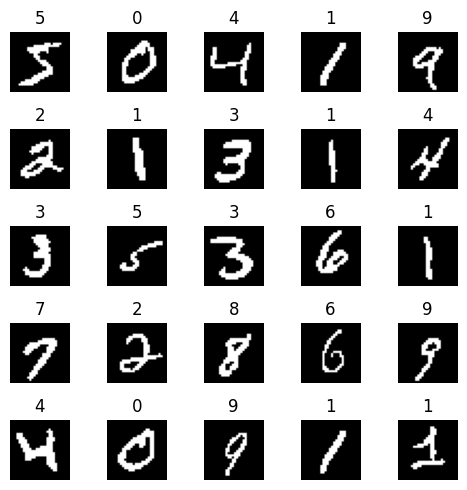

In [117]:
# Function to show a grid of images
def show_image_grid(images, labels, nrow=5, ncol=5):
    fig, axes = plt.subplots(nrow, ncol, figsize=(5, 5))
    axes = axes.flatten()
    
    for img, ax, label in zip(images[:nrow * ncol], axes, labels[:nrow * ncol]):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'{label.item()}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display the grid
show_image_grid(data, data_labels)

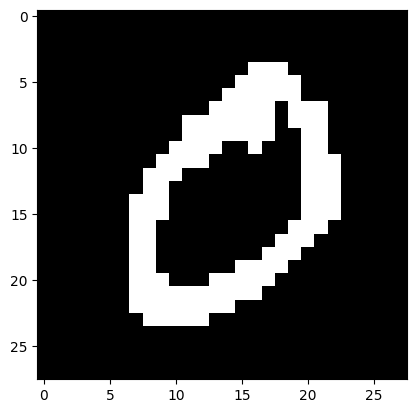

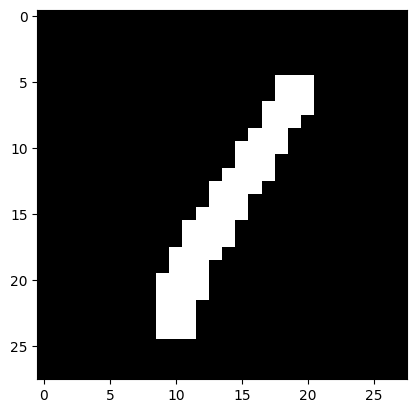

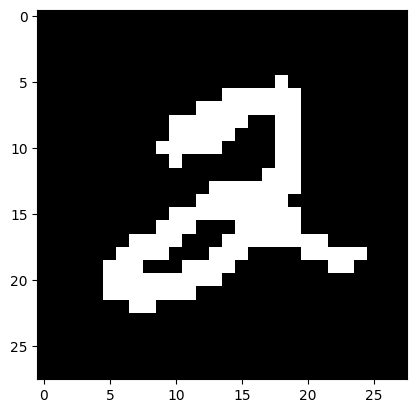

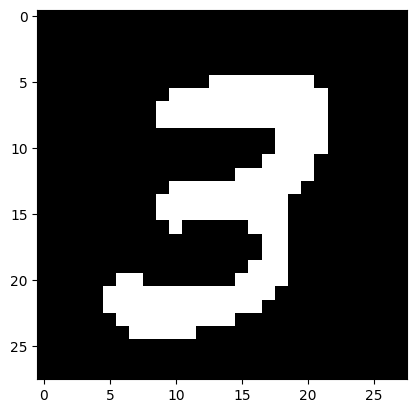

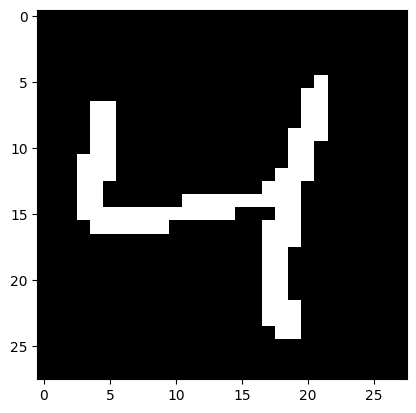

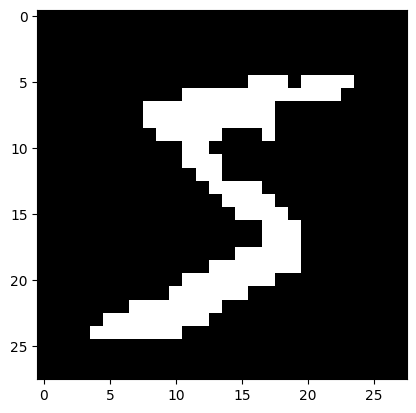

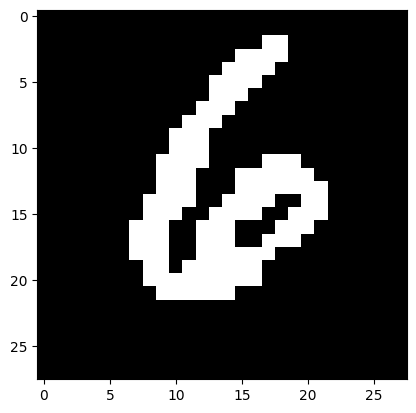

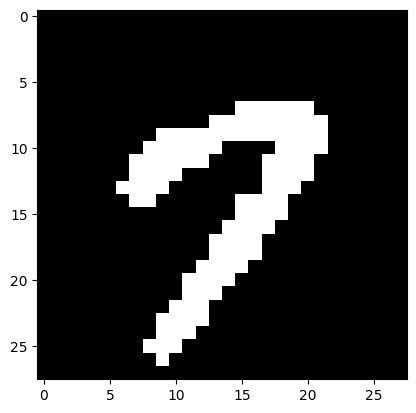

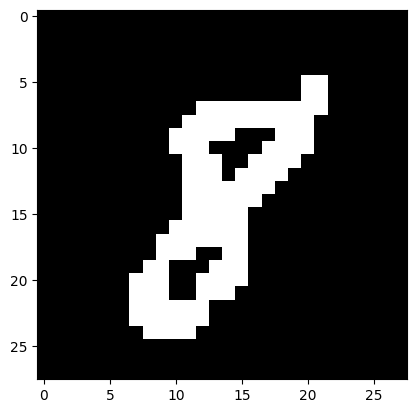

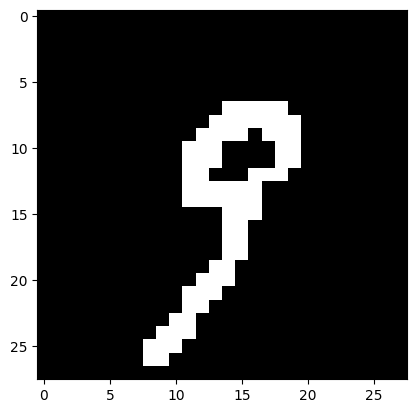

In [118]:
zero_img = data[1,:,:]
plt.imshow(zero_img, cmap='gray')
plt.show()

one_img = data[3,:,:]
plt.imshow(one_img, cmap='gray')
plt.show()

two_img = data[5,:,:]
plt.imshow(two_img, cmap='gray')
plt.show()

three_img = data[7,:,:]
plt.imshow(three_img, cmap='gray')
plt.show()

four_img = data[2,:,:]
plt.imshow(four_img, cmap='gray')
plt.show()

five_img = data[0,:,:]
plt.imshow(five_img, cmap='gray')
plt.show()

six_img = data[13,:,:]
plt.imshow(six_img, cmap='gray')
plt.show()

seven_img = data[15,:,:]
plt.imshow(seven_img, cmap='gray')
plt.show()

eight_img = data[17,:,:]
plt.imshow(eight_img, cmap='gray')
plt.show()

nine_img = data[19,:,:]
plt.imshow(nine_img, cmap='gray')
plt.show()

In [119]:

stacked_images = np.stack([zero_img, one_img, two_img, three_img, four_img, 
                           five_img, six_img, seven_img, eight_img, nine_img])

stacked_images = np.stack([four_img, seven_img])

print(stacked_images.shape)

(2, 28, 28)


In [120]:
# Process in batches
weight = np.zeros((n_nodes, n_nodes))

stacked_images_flat = stacked_images.reshape(stacked_images.shape[0], -1, 1)

inner_product = np.matmul(stacked_images_flat, stacked_images_flat.transpose(0, 2, 1))

weight += np.sum(inner_product, axis=0)

# # Zero out the diagonal
weight[np.eye(n_nodes, dtype=bool)] = 0

print(weight[:10,:10])


[[0. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 0. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 0. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 0. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 0. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 0. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 0. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 0. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 0.]]


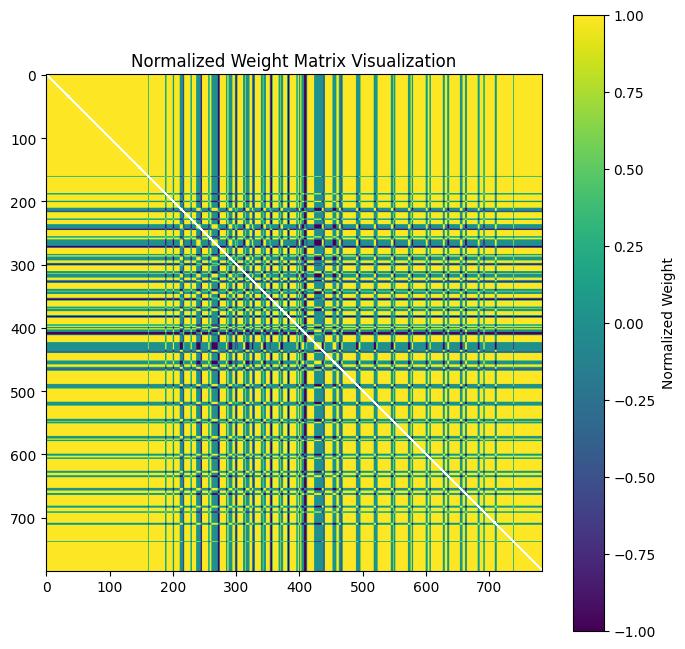

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [121]:
W_norm = weight / weight.max()

viz_img = np.copy(W_norm)
np.fill_diagonal(viz_img, np.nan)

# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(viz_img, cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()
print(W_norm)

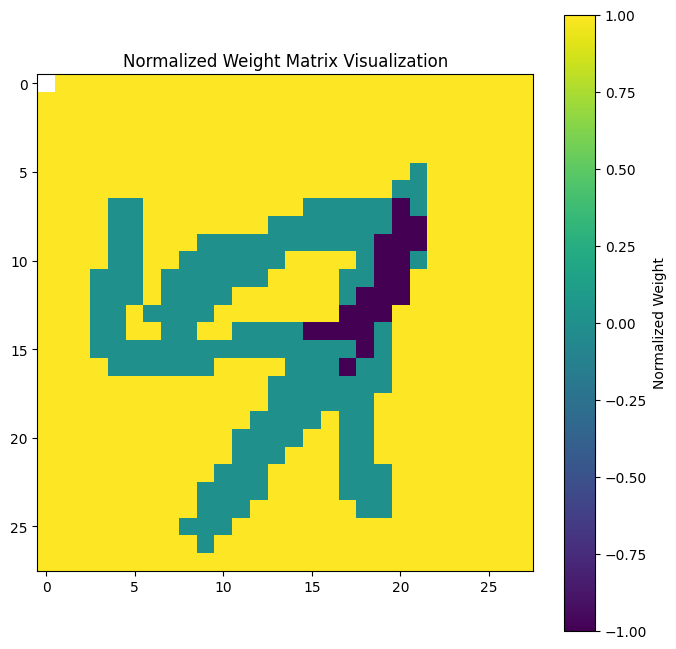

In [122]:
# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(viz_img[0,:].reshape(data.shape[1], data.shape[2]), cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

(784, 784)
[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


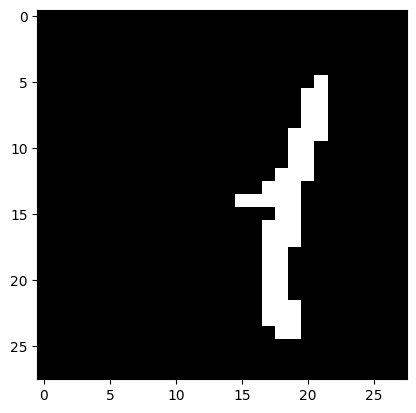

In [124]:
# random_img = np.ones((data.shape[1],data.shape[2])) * -1
# random_img = zero_img
# random_img = np.random.rand(data.shape[1], data.shape[2])
# random_img = np.where(random_img > 0.5, 1, -1)

# random_img = four_img
# random_img += np.random.uniform(-1,1,(data.shape[1], data.shape[2]))
# random_img = np.where(random_img > 0.5, 1, -1)

random_img = four_img
random_img[:,:random_img.shape[1]//2] = -1


random_img_flat = random_img.reshape(-1,1)
network =  random_img_flat @ random_img_flat.T
print(network.shape)
plt.imshow(random_img, cmap='gray')
frames = []
print(random_img[:10,:10])


In [46]:
node = np.random.choice(n_nodes, 1)[0]
print(f"Selected Node {node}")

energy_curr = -1 * network[node,:] @ W_norm[node,:]
energy_flip = network[node,:] @ W_norm[node,:] # -1 * -1 = 1

if energy_flip < energy_curr:
    print(f"Energy Before: {-1 * np.sum(network * W_norm)}")

    network[node,:] *= -1
    network[:,node] *= -1

    row_j = node // data.shape[1]
    col_j = node % data.shape[1]
    random_img[row_j, col_j] *= -1
    # random_img[col_j, row_j] *= -1

    print(f"Energy After: {-1 * np.sum(network * W_norm)}")
    plt.imshow(random_img, cmap='gray')
    plt.show()
else:
    print("No change")

Selected Node 339
No change


In [128]:

for _ in range(1000):

    node = np.random.choice(n_nodes, 1)[0]
    # print(f"Selected Node {node}")

    energy_curr = -1 * network[node,:] @ W_norm[node,:]
    energy_flip = network[node,:] @ W_norm[node,:] # -1 * -1 = 1

    if energy_flip < energy_curr:
        # print(f"Energy Before: {-1 * np.sum(network * W_norm)}")

        network[node,:] *= -1
        network[:,node] *= -1

        row_j = node // data.shape[1]
        col_j = node % data.shape[1]
        random_img[row_j, col_j] *= -1
        # random_img[col_j, row_j] *= -1
        vid_img = ((random_img + 1) * 127.5).astype(np.uint8)

        frames.append(np.copy(vid_img))
        print(f"Energy: {-1 * np.sum(network * W_norm)}")
        # plt.imshow(random_img, cmap='gray')
        # plt.show()
        # break
    else:
        pass
        # print("No change")

Energy: -418882.0


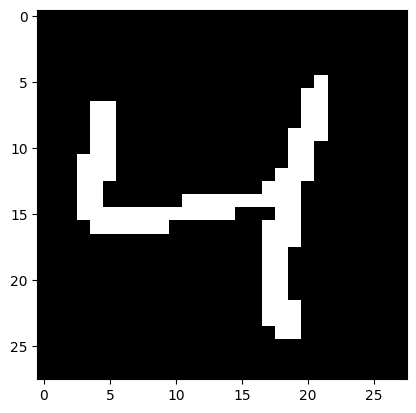

In [129]:
plt.imshow(random_img, cmap='gray')


In [130]:
# media.resize_video
media.show_video(frames, height=800, fps=30)